In [3]:
#data collection
import pandas_datareader as pdr
import yfinance as yf

In [4]:
# Define the stock symbol and time range
stock_symbol = 'NFLX'  #Netfix stock
start_date = '2021-07-16'  #from 16 july 2021
end_date = '2023-07-16'  #to 16 july 2023

In [5]:

# Retrieve the stock data
df = yf.download(stock_symbol, start=start_date, end=end_date)
df1 = df.reset_index()['Close']


[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-16,541.809998,544.059998,527.049988,530.309998,530.309998,3442100
2021-07-19,526.049988,534.909973,522.239990,532.280029,532.280029,3885800
2021-07-20,526.070007,536.640015,520.299988,531.049988,531.049988,6930400
2021-07-21,526.130005,530.989990,505.609985,513.630005,513.630005,11906800
2021-07-22,510.209991,513.679993,507.000000,511.769989,511.769989,4328100


In [8]:
df1 = df.reset_index()['Close']

In [9]:
df1

0      530.309998
1      532.280029
2      531.049988
3      513.630005
4      511.769989
          ...    
497    441.709991
498    440.209991
499    444.049988
500    450.380005
501    441.910004
Name: Close, Length: 502, dtype: float64

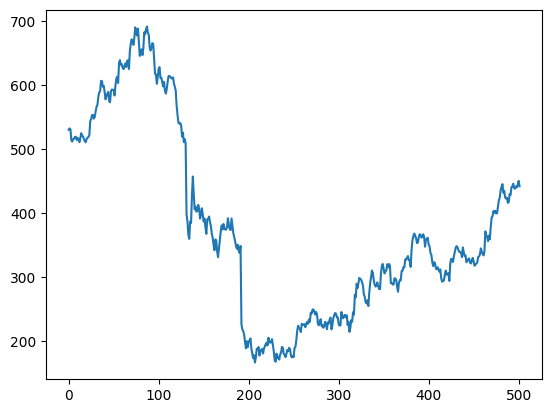

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [12]:
#Lstm are sensitive to scale of data. so we apply MinMax scaler 
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.69279677]
 [0.69654692]
 [0.69420541]
 [0.66104471]
 [0.65750398]
 [0.66443306]
 [0.66648898]
 [0.67109566]
 [0.67183809]
 [0.66222493]
 [0.6685449 ]
 [0.66393822]
 [0.65569559]
 [0.66812605]
 [0.68247928]
 [0.6742176 ]
 [0.67311347]
 [0.66525171]
 [0.65870331]
 [0.65550522]
 [0.66540391]
 [0.66921111]
 [0.67109566]
 [0.67673036]
 [0.71830507]
 [0.72433946]
 [0.73661771]
 [0.73676992]
 [0.725672  ]
 [0.73050711]
 [0.74725878]
 [0.76107895]
 [0.76680881]
 [0.7913272 ]
 [0.8036625 ]
 [0.80743171]
 [0.83823197]
 [0.83697553]
 [0.82077586]
 [0.8230221 ]
 [0.80507115]
 [0.78312269]
 [0.79285006]
 [0.79976014]
 [0.80518536]
 [0.77868726]
 [0.77432806]
 [0.80766014]
 [0.81262851]
 [0.81097239]
 [0.81144829]
 [0.79471555]
 [0.82366938]
 [0.84514206]
 [0.85049117]
 [0.83183578]
 [0.89172313]
 [0.89988954]
 [0.88608843]
 [0.88763034]
 [0.87693211]
 [0.87293459]
 [0.88210997]
 [0.88980048]
 [0.87931161]
 [0.89773846]
 [0.89969923]
 [0.87331534]
 [0.92665418]
 [0.94877413]
 [0.9618708 ]
 [0.95

In [15]:
#splitting dataset into train and test split
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [16]:
training_size,test_size

(326, 176)

In [17]:
import numpy
#convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
#reshape into x=t ,t+1, t+2, t+3 and y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape)
print(Y_train.shape)

(225, 100)
(225,)


In [20]:
print(X_test.shape)
print(Y_test.shape)

(75, 100)
(75,)


In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam' )

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 14s 991ms/step - loss: 0.1070 - val_loss: 0.0524
Epoch 2/100
4/4 [==============================] - 1s 239ms/step - loss: 0.0257 - val_loss: 0.0043
Epoch 3/100
4/4 [==============================] - 1s 239ms/step - loss: 0.0186 - val_loss: 0.0197
Epoch 4/100
4/4 [==============================] - 1s 229ms/step - loss: 0.0173 - val_loss: 0.0281
Epoch 5/100
4/4 [==============================] - 1s 240ms/step - loss: 0.0135 - val_loss: 0.0097
Epoch 6/100
4/4 [==============================] - 1s 240ms/step - loss: 0.0087 - val_loss: 0.0026
Epoch 7/100
4/4 [==============================] - 1s 234ms/step - loss: 0.0100 - val_loss: 0.0119
Epoch 8/100
4/4 [==============================] - 1s 231ms/step - loss: 0.0069 - val_loss: 0.0201
Epoch 9/100
4/4 [==============================] - 1s 234ms/step - loss: 0.0072 - val_loss: 0.0131
Epoch 10/100
4/4 [==============================] - 1s 225ms/step - loss: 0.0061 - val_loss: 0.0096
Epoch 11

4/4 [==============================] - 1s 235ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 84/100
4/4 [==============================] - 1s 224ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 85/100
4/4 [==============================] - 1s 247ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 86/100
4/4 [==============================] - 1s 230ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 87/100
4/4 [==============================] - 1s 242ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 88/100
4/4 [==============================] - 1s 234ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 89/100
4/4 [==============================] - 1s 225ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 90/100
4/4 [==============================] - 1s 228ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 91/100
4/4 [==============================] - 1s 239ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 92/100
4/4 [==============================] - 1s 234ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 93/100


In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 48ms/step


In [27]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

334.1324598787374

In [29]:
math.sqrt(mean_squared_error(Y_test,test_predict))

353.0664429117169

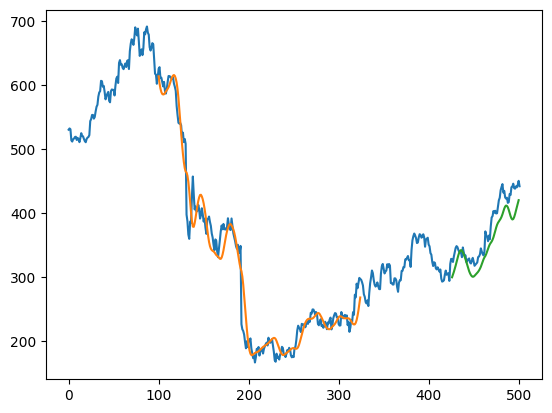

In [30]:
look_back=100
train_predictplot = numpy.empty_like(df1)
train_predictplot[:, :] = np.nan
train_predictplot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test prediction for plotting
test_predictplot = numpy.empty_like(df1)
test_predictplot[:, :] = numpy.nan
test_predictplot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predictplot)
plt.plot(test_predictplot)
plt.show()

In [31]:
len(test_data)

176

In [32]:
X_input=test_data[76:].reshape(1,-1)
X_input.shape

(1, 100)

In [33]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[0.32576334900032455,
 0.32077592213544504,
 0.29939845539183185,
 0.2870250450716947,
 0.29821823170237916,
 0.29650500189209905,
 0.28003885977704024,
 0.2769930856180367,
 0.2832749476201669,
 0.27727861423753164,
 0.2705017972327368,
 0.27682176844633977,
 0.25015229161261565,
 0.24059623255588602,
 0.24202393374667108,
 0.24474607007470683,
 0.2615929557446325,
 0.2735285167860039,
 0.2610408950180687,
 0.2641437749009712,
 0.2654001589200593,
 0.242766308157358,
 0.2931546445078642,
 0.30842156642104424,
 0.30703191634842186,
 0.2991509778904995,
 0.31535064599179974,
 0.3275336845345035,
 0.34095411058386915,
 0.34628417179214255,
 0.3433716636866735,
 0.33499582831939656,
 0.3292469143447836,
 0.3285996967761582,
 0.3271148898614742,
 0.31344704440408633,
 0.3423056514450188,
 0.3279144280893703,
 0.3166641357347868,
 0.31852968620433764,
 0.2983895488740761,
 0.3026346013282687,
 0.3076410827988846,
 0.30962078662292314,
 0.297304482026685,
 0.2946394514225483,
 0.303586402122

In [35]:
from numpy import array

lst_output = []
n_step = 100
i = 0
while(i<30):

    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{} day input {}". format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1,n_step, 1))
        yhat= model.predict(X_input, verbose=0)
        print("{} day output {}". format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_step,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)


[0.5005313]
101
1 day input [0.32077592 0.29939846 0.28702505 0.29821823 0.296505   0.28003886
 0.27699309 0.28327495 0.27727861 0.2705018  0.27682177 0.25015229
 0.24059623 0.24202393 0.24474607 0.26159296 0.27352852 0.2610409
 0.26414377 0.26540016 0.24276631 0.29315464 0.30842157 0.30703192
 0.29915098 0.31535065 0.32753368 0.34095411 0.34628417 0.34337166
 0.33499583 0.32924691 0.3285997  0.32711489 0.31344704 0.34230565
 0.32791443 0.31666414 0.31852969 0.29838955 0.3026346  0.30764108
 0.30962079 0.29730448 0.29463945 0.3035864  0.31135307 0.30029315
 0.28778647 0.29111778 0.29393513 0.29770428 0.31378968 0.31556007
 0.32180388 0.33958352 0.33031298 0.32269858 0.31862484 0.33044619
 0.39008606 0.37879766 0.37432424 0.36096092 0.37782686 0.36669078
 0.40453439 0.43137519 0.43565829 0.45069673 0.44563314 0.45147721
 0.44338691 0.4443006  0.46257519 0.48284853 0.49036778 0.51275415
 0.52251958 0.53091447 0.50557754 0.51079345 0.49128153 0.48753143
 0.49046294 0.47508186 0.47725194 0

9 day output [[0.43649626]]
10 day input [0.2705018  0.27682177 0.25015229 0.24059623 0.24202393 0.24474607
 0.26159296 0.27352852 0.2610409  0.26414377 0.26540016 0.24276631
 0.29315464 0.30842157 0.30703192 0.29915098 0.31535065 0.32753368
 0.34095411 0.34628417 0.34337166 0.33499583 0.32924691 0.3285997
 0.32711489 0.31344704 0.34230565 0.32791443 0.31666414 0.31852969
 0.29838955 0.3026346  0.30764108 0.30962079 0.29730448 0.29463945
 0.3035864  0.31135307 0.30029315 0.28778647 0.29111778 0.29393513
 0.29770428 0.31378968 0.31556007 0.32180388 0.33958352 0.33031298
 0.32269858 0.31862484 0.33044619 0.39008606 0.37879766 0.37432424
 0.36096092 0.37782686 0.36669078 0.40453439 0.43137519 0.43565829
 0.45069673 0.44563314 0.45147721 0.44338691 0.4443006  0.46257519
 0.48284853 0.49036778 0.51275415 0.52251958 0.53091447 0.50557754
 0.51079345 0.49128153 0.48753143 0.49046294 0.47508186 0.47725194
 0.50154191 0.49849614 0.52181526 0.5236237  0.53211375 0.51867433
 0.51726568 0.52413765

17 day output [[0.32047457]]
18 day input [0.2610409  0.26414377 0.26540016 0.24276631 0.29315464 0.30842157
 0.30703192 0.29915098 0.31535065 0.32753368 0.34095411 0.34628417
 0.34337166 0.33499583 0.32924691 0.3285997  0.32711489 0.31344704
 0.34230565 0.32791443 0.31666414 0.31852969 0.29838955 0.3026346
 0.30764108 0.30962079 0.29730448 0.29463945 0.3035864  0.31135307
 0.30029315 0.28778647 0.29111778 0.29393513 0.29770428 0.31378968
 0.31556007 0.32180388 0.33958352 0.33031298 0.32269858 0.31862484
 0.33044619 0.39008606 0.37879766 0.37432424 0.36096092 0.37782686
 0.36669078 0.40453439 0.43137519 0.43565829 0.45069673 0.44563314
 0.45147721 0.44338691 0.4443006  0.46257519 0.48284853 0.49036778
 0.51275415 0.52251958 0.53091447 0.50557754 0.51079345 0.49128153
 0.48753143 0.49046294 0.47508186 0.47725194 0.50154191 0.49849614
 0.52181526 0.5236237  0.53211375 0.51867433 0.51726568 0.52413765
 0.52128225 0.52859207 0.54064191 0.5245184  0.50053132 0.50444055
 0.5044446  0.5010139

25 day output [[0.26333794]]
26 day input [0.31535065 0.32753368 0.34095411 0.34628417 0.34337166 0.33499583
 0.32924691 0.3285997  0.32711489 0.31344704 0.34230565 0.32791443
 0.31666414 0.31852969 0.29838955 0.3026346  0.30764108 0.30962079
 0.29730448 0.29463945 0.3035864  0.31135307 0.30029315 0.28778647
 0.29111778 0.29393513 0.29770428 0.31378968 0.31556007 0.32180388
 0.33958352 0.33031298 0.32269858 0.31862484 0.33044619 0.39008606
 0.37879766 0.37432424 0.36096092 0.37782686 0.36669078 0.40453439
 0.43137519 0.43565829 0.45069673 0.44563314 0.45147721 0.44338691
 0.4443006  0.46257519 0.48284853 0.49036778 0.51275415 0.52251958
 0.53091447 0.50557754 0.51079345 0.49128153 0.48753143 0.49046294
 0.47508186 0.47725194 0.50154191 0.49849614 0.52181526 0.5236237
 0.53211375 0.51867433 0.51726568 0.52413765 0.52128225 0.52859207
 0.54064191 0.5245184  0.50053132 0.50444055 0.5044446  0.50101399
 0.49474251 0.48617592 0.47575095 0.46381024 0.45063978 0.43649626
 0.42162982 0.4063067

In [36]:
import numpy as np

day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)


In [37]:
import matplotlib.pyplot as plt

In [38]:
len(df1)

502

In [39]:
df3=df1.tolist()
df3.extend(lst_output)

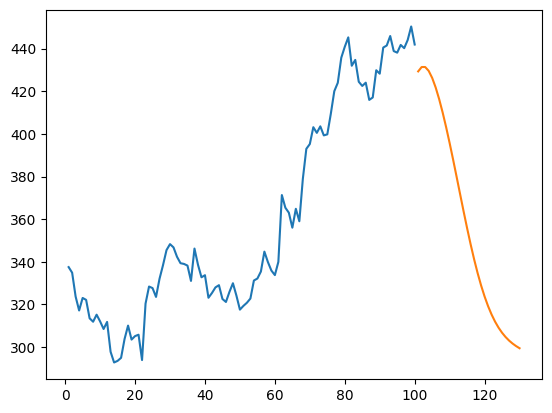

In [40]:
plt.plot(day_new, scaler.inverse_transform(df1[402:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


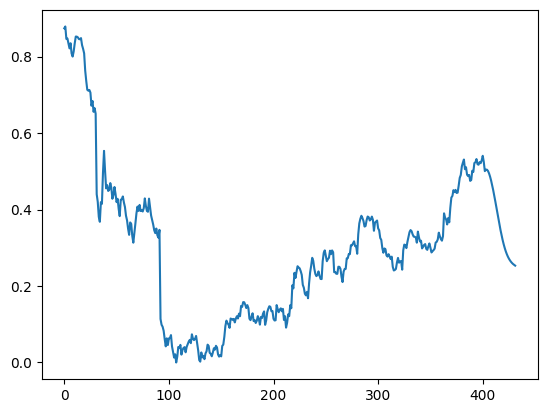

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[100:])
